# Отток клиентов

# "Бета-банк"
> Борьба за внимание клиентов среди различных организаций - явление не редкое в современном мире! И вопрос сохранности уже существующей клиентсокй базы также очень важен. <div/>
> "Бета-банк" начал терять клиентов. Было принято решение сохрнять уже имеющихся клиентов, нежели искать новых. Такоим образом, данный проект будет посвящен анализу, построению модели, которая предскажет с высокой долей вероятности поведение клиентов в будущем. Для этого я располагаю историческими данными о поведении людей- клиентов этого банка! <div/>
После выбора модели, приведу значение F1  параметра к наибольшему возможному значению!

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [16]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


> Табличные данные соответствуют своим форматам 

In [15]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

> Список стран не такой уж большой. Это позволит не получить огромные данные в таблице в случае кодирования

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


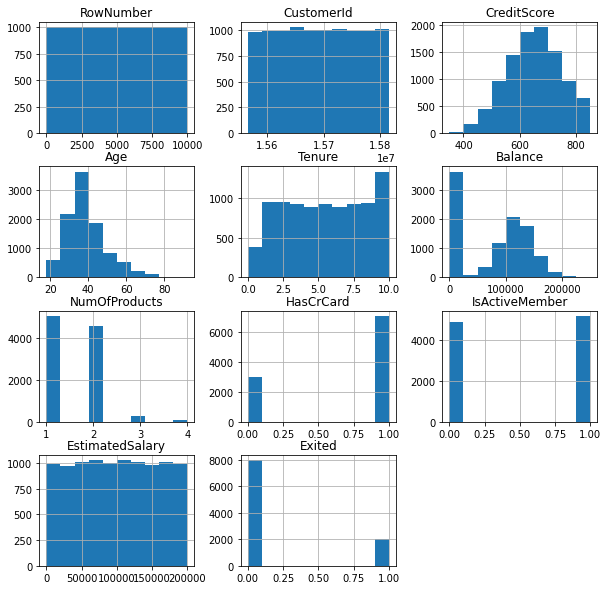

In [9]:
data.hist(bins=10, figsize=(10,10));

In [10]:
data.duplicated().sum()

0

> Дубликаты отсутствуют!

In [10]:
data.isna().sum()
median_tenure = data['Tenure'].median()
data['Tenure'] = data['Tenure'].fillna(median_tenure)

In [11]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> Имеющиеся пропуска в столбце "Tenure" скорее всего возникли из-за недолгого пребывания человека в качестве клиента банка (менее года). Принял решение заполнить пропуска нулями!<div/>
Таким образом, подготовив данные для дальнейшего исследования, могу заключить, что данные без дубликатов, форматы данных соответствуют действительности. Гистограммы с количественными значениями в большинстве распределны нормально! Проделана работа с пропусками. Данные готовы для дальнейшего исследования. 

## Исследование задачи

In [12]:
data_ohe = pd.get_dummies(data[['Gender', 'Geography']], drop_first=True)

In [13]:
data_ohe

,Gender_Male,Geography_Germany,Geography_Spain
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,0,0,0
9998,1,1,0


> Категориальный значения столбцов "Gender" и "Geography" прямым кодированием перевел в количественные

In [14]:
data = data.join(pd.get_dummies(data[['Gender', 'Geography']], drop_first=True))

In [15]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [16]:
data.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


> И присоединил их в исходный датафрейм!

In [17]:
target = data['Exited']
features = data.drop(['Exited', 'Geography', 'Gender'], axis=1)

In [19]:
data_train, data_test1 = train_test_split(data, test_size=0.4, random_state=12345)
data_test, data_valid = train_test_split(data_test1, test_size=0.5, random_state=12345)

In [20]:
data_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
7479,567,Spain,Male,35,8.0,153137.74,1,1,0,88659.07,0,1,0,1
3411,711,France,Female,37,8.0,113899.92,1,0,0,80215.20,0,0,0,0
6027,850,Germany,Male,44,3.0,140393.65,2,0,1,186285.52,0,1,1,0
1247,512,France,Male,24,6.0,0.00,2,1,0,37654.31,0,1,0,0
3716,665,Germany,Female,27,2.0,147435.96,1,0,0,187508.06,0,0,1,0


In [21]:
data_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
8532,585,France,Female,35,2.0,0.00,2,1,0,98621.04,1,0,0,0
5799,625,France,Female,45,3.0,0.00,1,1,1,184474.15,1,0,0,0
5511,667,Germany,Male,32,0.0,103846.65,1,1,0,20560.69,0,1,1,0
7365,568,Spain,Female,36,10.0,153610.61,1,1,1,54083.80,1,0,0,1
7367,606,Spain,Male,42,10.0,0.00,2,1,0,177938.52,0,1,0,1


In [22]:
data_valid.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
7041,438,France,Male,38,2.0,0.00,2,1,0,136859.55,0,1,0,0
5709,644,France,Female,39,9.0,0.00,1,1,0,3740.93,0,0,0,0
7117,564,Spain,Male,31,5.0,121461.87,1,1,1,20432.09,1,1,0,1
7775,628,Spain,Male,40,10.0,0.00,2,1,0,103832.58,0,1,0,1
8735,728,France,Male,30,10.0,114835.43,1,0,1,37662.49,0,1,0,0


In [23]:
print('Размер обучающей выборки:', data_train.shape[0]/data.shape[0])

Размер обучающей выборки: 0.6


In [24]:
print('Размер валидационной выборки:', data_valid.shape[0]/data.shape[0])

Размер валидационной выборки: 0.2


In [25]:
print('Размер тестовой выборки:', data_test.shape[0]/data.shape[0])

Размер тестовой выборки: 0.2


> Разделил данный на 3 выборки: обучающую, валидационную и тестовую в соотношении 60/20/20 %. Проверив, заключил, что разделение произошло корректно! 

In [26]:
target_train = data_train['Exited']
features_train = data_train.drop(['Exited', 'Geography', 'Gender'], axis=1)

In [27]:
target_train.head()

7479    0
3411    0
6027    0
1247    0
3716    0
Name: Exited, dtype: int64

In [28]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7479,567,35,8.0,153137.74,1,1,0,88659.07,1,0,1
3411,711,37,8.0,113899.92,1,0,0,80215.20,0,0,0
6027,850,44,3.0,140393.65,2,0,1,186285.52,1,1,0
1247,512,24,6.0,0.00,2,1,0,37654.31,1,0,0
3716,665,27,2.0,147435.96,1,0,0,187508.06,0,1,0


In [29]:
target_valid = data_valid['Exited']
features_valid = data_valid.drop(['Exited', 'Geography', 'Gender'], axis=1)

In [30]:
target_valid.head()

7041    0
5709    0
7117    1
7775    0
8735    0
Name: Exited, dtype: int64

In [31]:
features_valid.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7041,438,38,2.0,0.00,2,1,0,136859.55,1,0,0
5709,644,39,9.0,0.00,1,1,0,3740.93,0,0,0
7117,564,31,5.0,121461.87,1,1,1,20432.09,1,0,1
7775,628,40,10.0,0.00,2,1,0,103832.58,1,0,1
8735,728,30,10.0,114835.43,1,0,1,37662.49,1,0,0


In [32]:
target_test = data_test['Exited']
features_test = data_test.drop(['Exited', 'Geography', 'Gender'], axis=1)

In [33]:
target_test.head()

8532    1
5799    1
5511    0
7365    1
7367    0
Name: Exited, dtype: int64

In [34]:
features_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
8532,585,35,2.0,0.00,2,1,0,98621.04,0,0,0
5799,625,45,3.0,0.00,1,1,1,184474.15,0,0,0
5511,667,32,0.0,103846.65,1,1,0,20560.69,1,1,0
7365,568,36,10.0,153610.61,1,1,1,54083.80,0,0,1
7367,606,42,10.0,0.00,2,1,0,177938.52,1,0,1


In [35]:
numeric = ['Balance', 'EstimatedSalary', 'Age']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

> В качестве целевого признака выбрал столбец "Exited", исключил из признаков столбцы с фамилиями клиентов, идентификационным номером клиента в базе, так как эти данные не будут влиять на предсказания модели. А так же столбцы с категориальными значениями стран и пол клиента. Эти данные остались в таблице в кодированном виде!

In [36]:
len(features_valid)

2000

In [38]:
len(features_train)

6000

In [37]:
best_model_1 = None
best_result_1 = 0
best_f1 = 0

for depth in range(1,10):
    for leaf in range(1,10):
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model_1.fit(features_train, target_train)
        train_predictions = model_1.predict(features_valid)
        result_1 = model_1.score(features_valid, target_valid)
        result_f1 = f1_score(target_valid, train_predictions)
        if result_f1 > best_f1:
            best_model_1 = model_1
            best_result_1 = result_1
            best_f1 = result_f1
            max_depth = depth
            min_sample_leaf = leaf
print('Максимальная глубина дерева:', max_depth)
print('Минимальное количество обьектов в листе:', min_sample_leaf)
print("Accuracy наилучшей модели на валидационной выборке:", best_result_1)
print('F1 этой модели:', round(best_f1, 4))
#print('F1 этой модели:', round(f1_score(target_valid, train_predictions), 4))

Максимальная глубина дерева: 9
Минимальное количество обьектов в листе: 8
Accuracy наилучшей модели на валидационной выборке: 0.83
F1 этой модели: 0.5355


In [35]:
best_model_2 = None
best_result_2 = 0
best_f2 = 0

for est in range(10,151,10):
    for depth in range(1, 16):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_2.fit(features_train, target_train)
        train_predictions_2 = model_2.predict(features_valid)
        result_2 = model_2.score(features_valid, target_valid)
        result_f2 = f1_score(target_valid, train_predictions_2)
        if result_f2 > best_f2:
            best_model_2 = model_2
            best_result_2 = result_2
            best_f2 = result_f2
            n_estimators = est
            max_depth = depth
print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на валидационной выборке:', best_result_2)
print('F1 этой модели:', round(best_f2, 4))
#print('F1 этой модели:', round(f1_score(target_valid, train_predictions_2), 4))


est: 120
depth: 15
Accuracy наилучшей модели на валидационной выборке: 0.852
F1 этой модели: 0.5556


In [36]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model_3.fit(features_train, target_train)
train_predictions_3 = model_3.predict(features_valid)
result_3 = model_3.score(features_valid, target_valid)
#dump(model_3, 'model_9_1.joblib')

print('Accuracy')
print('Валидационная выборка:', result_3)
print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3), 4))
#print(round(f1_score(target_valid, train_predictions), 4))


Accuracy
Валидационная выборка: 0.7925
F1 этой модели: 0.2757


 > Построено 3 модели на обучающей выборке. Наибольшую точность показали модель случайного леса с гиперпараметрами " глубиной ": 15, и "параметром  est": 120 с точностью : 0.852 и значением F1 модели : 0.5556 и модель решающего дерева с большим показателем точности: 0.83 и значением F1 модели : 0.5355. При этом, гиперпараметры в этой модели : максимальная глубина: 9 и минимальное количество обьектов в листе: 8<div/>
Меньшие показатели дала логистическая регрессия. точность составила: 0.7925 и значением F1 модели :0.2757. Но для повышения значения  F1 учту дисбаланс классов и если потребуется изменю обьем выборки для достижения необходимого результата

## Борьба с дисбалансом

In [38]:
best_model_1 = None
best_result_1 = 0
best_f1 = 0

for depth in range(1,10):
    for leaf in range(1,10):
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced')
        model_1.fit(features_train, target_train)
        train_predictions = model_1.predict(features_valid)
        result_1 = model_1.score(features_valid, target_valid) 
        result_f1 = f1_score(target_valid, train_predictions)
        if result_f1 > best_f1:
            best_model_1 = model_1
            best_result_1 = result_1
            best_f1 = result_f1
            max_depth = depth
            min_sample_leaf = leaf
print('Максимальная глубина дерева:', max_depth)
print('Минимальное количество обьектов в листе:', min_sample_leaf)
print("Accuracy наилучшей модели на валидационной выборке:", best_result_1)
print('F1 этой модели:', round(best_f1, 4))
#print('F1 этой модели:', round(f1_score(target_valid, train_predictions), 4))

Максимальная глубина дерева: 5
Минимальное количество обьектов в листе: 7
Accuracy наилучшей модели на валидационной выборке: 0.7985
F1 этой модели: 0.5858


> Если учесть дисбаланс классов то значение F1 этой модели повысилось до значения 0.5655. Посмотрю как повлияет изменение обьема выборки на это значение. 

In [39]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model_3.fit(features_train, target_train)
train_predictions_3 = model_3.predict(features_valid)
result_3 = model_3.score(features_valid, target_valid)
#dump(model_3, 'model_9_1.joblib')

print('Accuracy')
print('Обучающая выборка:', result_3)
print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3), 4))

Accuracy
Обучающая выборка: 0.6975
F1 этой модели: 0.4789


In [40]:
best_model_2 = None
best_result_2 = 0
best_f2 = 0
for est in range(10,151,10):
    for depth in range(1, 16):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_2.fit(features_train, target_train)
        train_predictions_2 = model_2.predict(features_valid)
        result_2 = model_2.score(features_valid, target_valid)
        result_f2 = f1_score(target_valid, train_predictions_2)
        if result_f2 > best_f2:
            best_model_2 = model_2
            best_result_2 = result_2
            best_f2 = result_f2
            n_estimators = est
            max_depth = depth
print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на валидационной выборке:', result_2)
print('F1 этой модели:', round(best_f2, 4))
#print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3), 4))

est: 60
depth: 8
Accuracy наилучшей модели на валидационной выборке: 0.8465
F1 этой модели: 0.6214


> Обучив заново модели с учетом дисбаланса классов, получил, что, значение F1 в модели решающего дерева  повысилось до значения 0.5858 с гиперпараметрами "глубины"=5 и "количество обьектов в листе"=7. Значение F1 в модели случайного леса повысилось до 0.6214 с гиперпараметрами est: 60 и глубина: 8. Модель логистической регрессии показала также повышение результатов до значения  F1: 0.4789.   Посмотрю как влияет увеличение обьема выборки и уменьшение на эти параметры. 

In [41]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]
repeat = 4
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones]* repeat)
features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

In [42]:
best_model_1 = None
best_result_1 = 0
best_f1 = 0

for depth in range(1,10):
    for leaf in range(1,10):
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced')
        model_1.fit(features_upsampled, target_upsampled)
        train_predictions = model_1.predict(features_valid)
        result_1 = model_1.score(features_valid, target_valid) 
        result_f1 = f1_score(target_valid, train_predictions)
        if result_f1 > best_f1:
            best_model_1 = model_1
            best_result_1 = result_1
            best_f1 = result_f1
            max_depth = depth
            min_sample_leaf = leaf
print('Максимальная глубина дерева:', max_depth)
print('Минимальное количество обьектов в листе:', min_sample_leaf)
print("Accuracy наилучшей модели на валидационной выборке:", best_result_1)
print('F1 этой модели:', round(best_f1, 4))

Максимальная глубина дерева: 5
Минимальное количество обьектов в листе: 2
Accuracy наилучшей модели на валидационной выборке: 0.7975
F1 этой модели: 0.5812


In [43]:
best_model_2 = None
best_result_2 = 0
best_f2 = 0
for est in range(10,151,10):
    for depth in range(1, 16):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_2.fit(features_upsampled, target_upsampled)
        train_predictions_2 = model_2.predict(features_valid)
        result_2 = model_2.score(features_valid, target_valid)
        result_f2 = f1_score(target_valid, train_predictions_2)
        if result_2 > best_result_2:
            best_model_2 = model_2
            best_result_2 = result_2
            best_f2 = result_f2
            n_estimators = est
            max_depth = depth
print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на валидационной выборке:', result_2)
print('F1 этой модели:', round(best_f2, 4))

est: 80
depth: 14
Accuracy наилучшей модели на валидационной выборке: 0.8395
F1 этой модели: 0.6087


In [44]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model_3.fit(features_upsampled, target_upsampled)
train_predictions_3 = model_3.predict(features_valid)
result_3 = model_3.score(features_valid, target_valid)

print('Accuracy')
print('Обучающая выборка:', result_3)
print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3), 4))

Accuracy
Обучающая выборка: 0.7025
F1 этой модели: 0.4866


> Увеличение выборки не дало существенного  изменения значения F1. Так для модели случайного леса с гиперпараметрами est: 80
depth: 14 и est: 80 получил следующие значения:
Accuracy наилучшей модели на валидационной выборке: 0.8395
F1 этой модели: 0.6087
А для модели Решающего дерева с гиперпараметрами: Максимальная глубина дерева: 5
Минимальное количество обьектов в листе: 2
Accuracy наилучшей модели на валидационной выборке: 0.7975
F1 этой модели: 0.5812
Модель логистической регрессии и здесь показала наименьшее значение точности и F1 <div/>
Посмотрим как влюяет уменьшение обьема выборки на получаемые данные

In [45]:
features_downsampled = pd.concat([features_zeros.sample(frac=0.25, random_state=12345)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac=0.25, random_state=12345)] + [target_ones])  
features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

In [46]:
best_model_1 = None
best_result_1 = 0
best_f1 = 0

for depth in range(1,10):
    for leaf in range(1,10):
        model_1 = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, class_weight='balanced')
        model_1.fit(features_downsampled, target_downsampled)
        train_predictions = model_1.predict(features_valid)
        result_1 = model_1.score(features_valid, target_valid)
        result_f1 = f1_score(target_valid, train_predictions)
        if result_f1 > best_f1:
            best_model_1 = model_1
            best_result_1 = result_1
            best_f1 = result_f1
            max_depth = depth
            min_sample_leaf = leaf
print('Максимальная глубина дерева:', max_depth)
print('Минимальное количество обьектов в листе:', min_sample_leaf)
print("Accuracy наилучшей модели на валидационной выборке:", best_result_1)
print('F1 этой модели:', round(best_f1, 4))


Максимальная глубина дерева: 5
Минимальное количество обьектов в листе: 8
Accuracy наилучшей модели на валидационной выборке: 0.8135
F1 этой модели: 0.6119


In [47]:
best_model_2 = None
best_result_2 = 0
best_f2 = 0
for est in range(10,151,10):
    for depth in range(1, 16):
        model_2 = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_2.fit(features_downsampled, target_downsampled)
        train_predictions_2 = model_2.predict(features_valid)
        result_2 = model_2.score(features_valid, target_valid)
        result_f2 = f1_score(target_valid, train_predictions_2)
        if result_2 > best_result_2:
            best_model_2 = model_2
            best_result_2 = result_2
            best_f2 = result_f2
            n_estimators = est
            max_depth = depth
print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на валидационной выборке:', result_2)
print('F1 этой модели:', round(best_f2, 4))

est: 140
depth: 8
Accuracy наилучшей модели на валидационной выборке: 0.7735
F1 этой модели: 0.5957


In [48]:
model_3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000, class_weight='balanced')
model_3.fit(features_downsampled, target_downsampled)
train_predictions_3 = model_3.predict(features_valid)
result_3 = model_3.score(features_valid, target_valid)

print('Accuracy')
print('Обучающая выборка:', result_3)
print('F1 этой модели:', round(f1_score(target_valid, train_predictions_3), 4))

Accuracy
Обучающая выборка: 0.7
F1 этой модели: 0.4872


> Таким образом, масимальное значение F1 было получено в модели решающего дерева с учетом дисбаланса при уменьшении выборки и составило 0.6119. При это гиперпараметры следующие: максимальная глубина = 5 и минимальное количество обьектов в листе = 8. Модель случайного леса  показала максимум значения F1 с гиперпараметрами est:60 и глубиной =8  с учетом дисбаланса классов. При этом F1 =0.6214. 

## Тестирование модели

In [52]:
model_2 = RandomForestClassifier(random_state=12345, n_estimators=60, max_depth=8, class_weight='balanced')
model_2.fit(features_train, target_train)
test_predictions_2 = model_2.predict(features_test)
result_2 = model_2.score(features_test, target_test)
result_f2 = f1_score(target_test, test_predictions_2)

print('est:', n_estimators)
print('depth:', max_depth)
print('Accuracy наилучшей модели на тестовой выборке:', result_2)
print('F1 этой модели:', round(result_f2, 4))

est: 140
depth: 8
Accuracy наилучшей модели на тестовой выборке: 0.8285
F1 этой модели: 0.626


> Проведя проверку на тестовой выборке c помощью модели случайного леса, учитывая дисбаланс и гиперпараметрами est=140 и глубина=8, получил следующие значения точности: 0.8285 и F1: 0.626. Как и выше, пытаясь улучшить модель, я увидел, что увеличение выборки и уменьшение, не дает существенного роста значения F1.

> Проведя увеличение выборки получил увеличение значения f1 до 0.6207 на рабоче модели. Что есть отличный результат работы

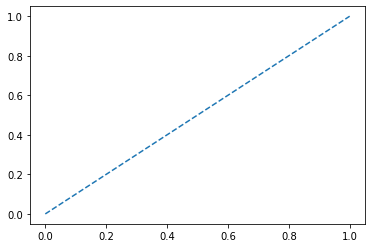

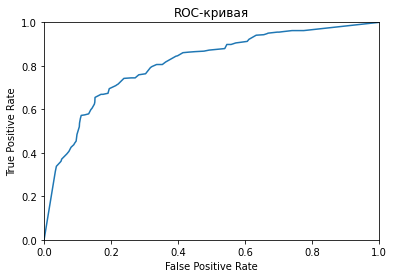

In [52]:
probabilities_valid = model_1.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.figure()

plt.plot(fpr, tpr)

plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')

plt.show()



In [53]:
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Площадь под кривой ROC:', round(auc_roc, 4))

Площадь под кривой ROC: 0.811


> Вывод: <div/> Проделав большую работу, приведя данные в надлежащий вид, поработав с пропусками, прямым кодированием значений столбцов "Пол" и "Страна", пробуя различные модели пришел к выводу, что наибольшей эффективность как на валидационной выборке, так и на тестовой обладает модель решающего дерева с ниперпараметрами: глубина 7, количество листьев 3, учитывая дисбаланс! Увеличение и уменьшение выборки не дало существенного роста значений точности и F1. В то время как учет дисбаланса классов показал рост с 0.51 до 0.56. Применив метод на тестовой выборке также получили высокие показатели точности: 0.782 и F1: 0.5683. Также проведено исследование метрики AUC ROC и получено значение площади под кривой: 0.8101 что также является высоким показателем!